# OpenWeather API Testing & Exploration
# Test different OpenWeather API endpoints for PV optimization project

🌤️ OPENWEATHER API TESTING & EXPLORATION

1. 🔑 ENVIRONMENT SETUP & API CONFIGURATION
---------------------------------------------
📍 Location: 51.009167, 13.637528
✅ OpenWeather API Key loaded (ends with: ...32764f)


2. 🌐 OPENWEATHER API ENDPOINTS
-----------------------------------


3. 🧪 API TESTING EXECUTION
------------------------------
🚀 Testing OpenWeather API endpoints...

📍 Testing APIs for location: 51.009167, 13.637528
🌐 Testing Current Weather (Free)...
   URL: https://api.openweathermap.org/data/2.5/weather
   Params: {'lat': 51.009167, 'lon': 13.637528, 'appid': '55abacf6b6d8028b8e82c11e4a32764f', 'units': 'metric'}
   Status Code: 200
   ✅ Success! Data received
   📊 Current conditions:
      Temperature: 31.8°C (feels like 30.5°C)
      Weather: clear sky
      Clouds: 0%
      Humidity: 29%
      Wind: 4.0 m/s
      Visibility: 10.0 km

--------------------------------------------------
🌐 Testing 5-Day Forecast (Free)...
   URL: https://api.openweathermap.org/data/2.5

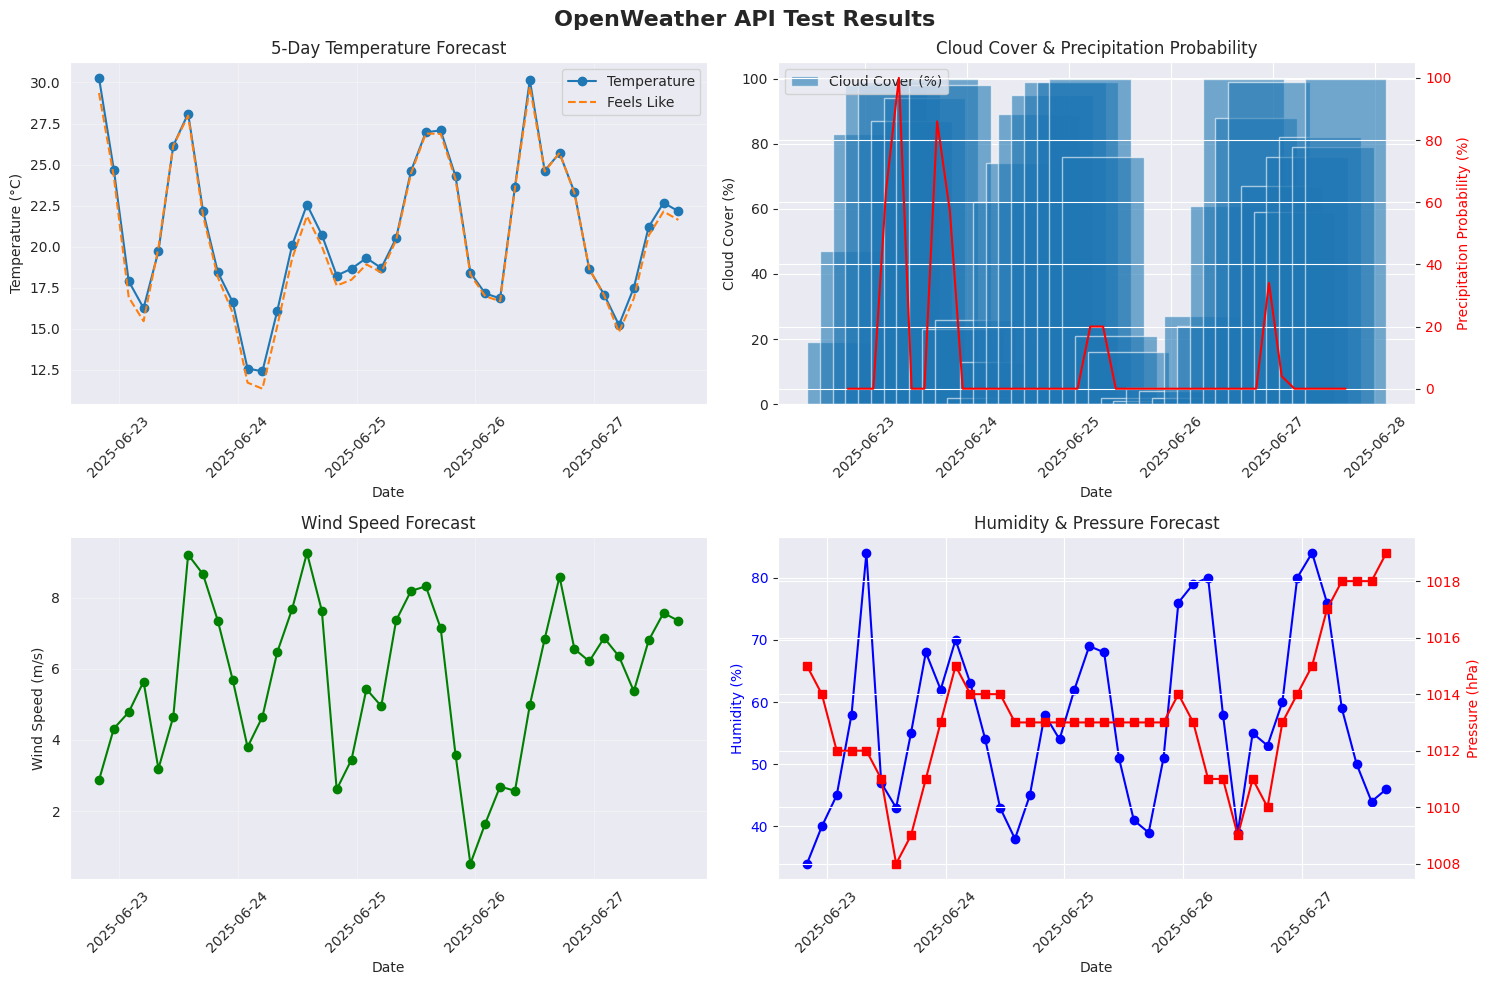



5. 💡 RECOMMENDATIONS FOR PV PROJECT
---------------------------------------------
🎯 BEST APIS FOR YOUR E-AUTO CHARGING PROJECT:
✅ 5-Day Forecast (Free):
   - Perfect for 24h, 72h prediction horizons
   - Includes cloud cover (key for solar prediction)
   - 3-hour intervals, good granularity
✅ Hourly Forecast (Pro):
   - Best granularity for your 15-min PV data
   - Up to 4 days hourly forecast

🔮 WEATHER FEATURES FOR ML MODEL:
1. Cloud cover percentage → Solar production prediction
2. Temperature → PV panel efficiency correlation
3. Humidity → Weather stability indicator
4. Wind speed → Panel cooling effect
5. Precipitation probability → Overcast conditions

📊 DATA INTEGRATION STRATEGY:
1. Use 5-day forecast for 24h and 72h predictions
2. Interpolate 3-hour data to 15-minute intervals
3. Create weather-based features (cloud cover trends, temperature changes)
4. Validate weather impact on historical PV production
5. Build ML features: cloud_cover_next_4h, temp_change_rate, etc.

💰 COS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from datetime import datetime, timedelta
import time
import os
from pathlib import Path
import warnings
from dotenv import load_dotenv

warnings.filterwarnings('ignore')

print("🌤️ OPENWEATHER API TESTING & EXPLORATION")
print("=" * 50)

# ===================================================================
# 1. ENVIRONMENT SETUP & API CONFIGURATION
# ===================================================================

print("\n1. 🔑 ENVIRONMENT SETUP & API CONFIGURATION")
print("-" * 45)

# Load environment variables from .env file
load_dotenv()

# Get API credentials from environment
API_KEY = os.getenv("OPENWEATHER_API_KEY")
LAT = float(os.getenv("RESIDENTIAL_HOME_LAT"))
LON = float(os.getenv("RESIDENTIAL_HOME_LON"))

print(f"📍 Location: {LAT:.6f}, {LON:.6f}")

if API_KEY:
    print(f"✅ OpenWeather API Key loaded (ends with: ...{API_KEY[-6:]})")
else:
    print("❌ No API key found in .env file")
    print("💡 Create .env file with:")
    print("   OPENWEATHER_API_KEY=your_api_key_here")
    exit()

# Create data directory for API responses
api_data_dir = "../data/external/weather/api_responses"
Path(api_data_dir).mkdir(parents=True, exist_ok=True)

# ===================================================================
# 2. API ENDPOINT DEFINITIONS
# ===================================================================

print("\n\n2. 🌐 OPENWEATHER API ENDPOINTS")
print("-" * 35)

class OpenWeatherTester:
    """Class to test different OpenWeather API endpoints"""

    def __init__(self, api_key, lat, lon):
        self.api_key = api_key
        self.lat = lat
        self.lon = lon
        self.base_url = "https://api.openweathermap.org/data/2.5"
        self.pro_base_url = "https://pro.openweathermap.org/data/2.5"

        # Track API calls
        self.api_calls_made = 0

    def make_request(self, url, params, endpoint_name):
        """Make API request with error handling and rate limiting"""
        try:
            print(f"🌐 Testing {endpoint_name}...")
            print(f"   URL: {url}")
            print(f"   Params: {params}")

            response = requests.get(url, params=params)
            self.api_calls_made += 1

            print(f"   Status Code: {response.status_code}")

            if response.status_code == 200:
                data = response.json()
                print(f"   ✅ Success! Data received")
                return data
            elif response.status_code == 401:
                print(f"   ❌ Authentication failed - check API key")
                return None
            elif response.status_code == 404:
                print(f"   ❌ Endpoint not found - might need Pro subscription")
                return None
            elif response.status_code == 429:
                print(f"   ⏰ Rate limit exceeded - waiting...")
                time.sleep(60)
                return None
            else:
                print(f"   ❌ Error: {response.status_code} - {response.text}")
                return None

        except requests.exceptions.RequestException as e:
            print(f"   ❌ Request failed: {e}")
            return None

    def test_current_weather(self):
        """Test current weather API"""
        url = f"{self.base_url}/weather"
        params = {
            'lat': self.lat,
            'lon': self.lon,
            'appid': self.api_key,
            'units': 'metric'
        }

        data = self.make_request(url, params, "Current Weather (Free)")

        if data:
            # Extract key information
            current_info = {
                'timestamp': datetime.now(),
                'temperature': data['main']['temp'],
                'feels_like': data['main']['feels_like'],
                'humidity': data['main']['humidity'],
                'pressure': data['main']['pressure'],
                'clouds': data['clouds']['all'],
                'visibility': data.get('visibility', 0) / 1000,  # km
                'wind_speed': data.get('wind', {}).get('speed', 0),
                'wind_direction': data.get('wind', {}).get('deg', 0),
                'weather_main': data['weather'][0]['main'],
                'weather_description': data['weather'][0]['description'],
                'sunrise': datetime.fromtimestamp(data['sys']['sunrise']),
                'sunset': datetime.fromtimestamp(data['sys']['sunset'])
            }

            print(f"   📊 Current conditions:")
            print(f"      Temperature: {current_info['temperature']:.1f}°C (feels like {current_info['feels_like']:.1f}°C)")
            print(f"      Weather: {current_info['weather_description']}")
            print(f"      Clouds: {current_info['clouds']}%")
            print(f"      Humidity: {current_info['humidity']}%")
            print(f"      Wind: {current_info['wind_speed']:.1f} m/s")
            print(f"      Visibility: {current_info['visibility']:.1f} km")

            # Save data
            pd.DataFrame([current_info]).to_csv(f"{api_data_dir}/current_weather.csv", index=False)

            return current_info

        return None

    def test_5day_forecast(self):
        """Test 5-day forecast API (free)"""
        url = f"{self.base_url}/forecast"
        params = {
            'lat': self.lat,
            'lon': self.lon,
            'appid': self.api_key,
            'units': 'metric'
        }

        data = self.make_request(url, params, "5-Day Forecast (Free)")

        if data:
            forecasts = []
            for item in data['list']:
                forecast = {
                    'timestamp': datetime.fromtimestamp(item['dt']),
                    'temperature': item['main']['temp'],
                    'feels_like': item['main']['feels_like'],
                    'temp_min': item['main']['temp_min'],
                    'temp_max': item['main']['temp_max'],
                    'humidity': item['main']['humidity'],
                    'pressure': item['main']['pressure'],
                    'clouds': item['clouds']['all'],
                    'wind_speed': item.get('wind', {}).get('speed', 0),
                    'wind_direction': item.get('wind', {}).get('deg', 0),
                    'weather_main': item['weather'][0]['main'],
                    'weather_description': item['weather'][0]['description'],
                    'rain_3h': item.get('rain', {}).get('3h', 0),
                    'snow_3h': item.get('snow', {}).get('3h', 0),
                    'pop': item.get('pop', 0)  # Probability of precipitation
                }
                forecasts.append(forecast)

            df_forecast = pd.DataFrame(forecasts)
            df_forecast.set_index('timestamp', inplace=True)

            print(f"   📊 Forecast data:")
            print(f"      Time range: {df_forecast.index.min()} to {df_forecast.index.max()}")
            print(f"      Data points: {len(df_forecast)}")
            print(f"      Temperature range: {df_forecast['temperature'].min():.1f}°C to {df_forecast['temperature'].max():.1f}°C")

            # Save data
            df_forecast.to_csv(f"{api_data_dir}/5day_forecast.csv")

            return df_forecast

        return None

    def test_hourly_forecast(self):
        """Test hourly forecast API (Pro subscription required)"""
        url = f"{self.pro_base_url}/forecast/hourly"
        params = {
            'lat': self.lat,
            'lon': self.lon,
            'appid': self.api_key,
            'units': 'metric'
        }

        data = self.make_request(url, params, "Hourly Forecast (Pro)")

        if data:
            # Process hourly data similar to 5-day forecast
            forecasts = []
            for item in data['list']:
                forecast = {
                    'timestamp': datetime.fromtimestamp(item['dt']),
                    'temperature': item['main']['temp'],
                    'humidity': item['main']['humidity'],
                    'pressure': item['main']['pressure'],
                    'clouds': item['clouds']['all'],
                    'wind_speed': item.get('wind', {}).get('speed', 0),
                    'weather_description': item['weather'][0]['description'],
                    'rain_1h': item.get('rain', {}).get('1h', 0)
                }
                forecasts.append(forecast)

            df_hourly = pd.DataFrame(forecasts)
            df_hourly.set_index('timestamp', inplace=True)

            print(f"   📊 Hourly forecast data:")
            print(f"      Time range: {df_hourly.index.min()} to {df_hourly.index.max()}")
            print(f"      Data points: {len(df_hourly)}")

            # Save data
            df_hourly.to_csv(f"{api_data_dir}/hourly_forecast.csv")

            return df_hourly

        return None

    def test_onecall_api(self):
        """Test One Call API (includes UV index, historical data access)"""
        url = "https://api.openweathermap.org/data/3.0/onecall"
        params = {
            'lat': self.lat,
            'lon': self.lon,
            'appid': self.api_key,
            'units': 'metric',
            'exclude': 'minutely'  # Exclude minutely data to reduce size
        }

        data = self.make_request(url, params, "One Call API (3.0)")

        if data:
            # Extract current data
            current = data.get('current', {})
            current_info = {
                'timestamp': datetime.fromtimestamp(current.get('dt', 0)),
                'temperature': current.get('temp', 0),
                'humidity': current.get('humidity', 0),
                'pressure': current.get('pressure', 0),
                'clouds': current.get('clouds', 0),
                'uvi': current.get('uvi', 0),  # UV Index
                'visibility': current.get('visibility', 0) / 1000,
                'wind_speed': current.get('wind_speed', 0),
                'weather_description': current.get('weather', [{}])[0].get('description', '')
            }

            # Extract hourly forecast
            hourly_data = []
            for hour in data.get('hourly', [])[:48]:  # Next 48 hours
                hourly_info = {
                    'timestamp': datetime.fromtimestamp(hour.get('dt', 0)),
                    'temperature': hour.get('temp', 0),
                    'humidity': hour.get('humidity', 0),
                    'clouds': hour.get('clouds', 0),
                    'uvi': hour.get('uvi', 0),
                    'wind_speed': hour.get('wind_speed', 0),
                    'pop': hour.get('pop', 0),  # Probability of precipitation
                    'weather_description': hour.get('weather', [{}])[0].get('description', '')
                }
                hourly_data.append(hourly_info)

            df_onecall_hourly = pd.DataFrame(hourly_data)
            if not df_onecall_hourly.empty:
                df_onecall_hourly.set_index('timestamp', inplace=True)

            print(f"   📊 One Call API data:")
            print(f"      Current UV Index: {current_info['uvi']:.1f}")
            print(f"      Hourly forecast points: {len(df_onecall_hourly)}")

            # Save data
            pd.DataFrame([current_info]).to_csv(f"{api_data_dir}/onecall_current.csv", index=False)
            if not df_onecall_hourly.empty:
                df_onecall_hourly.to_csv(f"{api_data_dir}/onecall_hourly.csv")

            return current_info, df_onecall_hourly

        return None, None

    def test_air_pollution(self):
        """Test Air Pollution API"""
        url = f"{self.base_url}/air_pollution"
        params = {
            'lat': self.lat,
            'lon': self.lon,
            'appid': self.api_key
        }

        data = self.make_request(url, params, "Air Pollution (Free)")

        if data and 'list' in data:
            pollution_data = data['list'][0]  # Current data
            pollution_info = {
                'timestamp': datetime.fromtimestamp(pollution_data['dt']),
                'aqi': pollution_data['main']['aqi'],  # Air Quality Index (1-5)
                'co': pollution_data['components']['co'],
                'no2': pollution_data['components']['no2'],
                'o3': pollution_data['components']['o3'],
                'pm2_5': pollution_data['components']['pm2_5'],
                'pm10': pollution_data['components']['pm10']
            }

            aqi_descriptions = {1: 'Good', 2: 'Fair', 3: 'Moderate', 4: 'Poor', 5: 'Very Poor'}

            print(f"   📊 Air pollution data:")
            print(f"      Air Quality Index: {pollution_info['aqi']} ({aqi_descriptions.get(pollution_info['aqi'], 'Unknown')})")
            print(f"      PM2.5: {pollution_info['pm2_5']:.1f} μg/m³")
            print(f"      PM10: {pollution_info['pm10']:.1f} μg/m³")
            print(f"      NO2: {pollution_info['no2']:.1f} μg/m³")

            # Save data
            pd.DataFrame([pollution_info]).to_csv(f"{api_data_dir}/air_pollution.csv", index=False)

            return pollution_info

        return None

# ===================================================================
# 3. API TESTING EXECUTION
# ===================================================================

print("\n\n3. 🧪 API TESTING EXECUTION")
print("-" * 30)

# Initialize API tester
api_tester = OpenWeatherTester(API_KEY, LAT, LON)

print("🚀 Testing OpenWeather API endpoints...")
print("=" * 45)

# Test all available endpoints
test_results = {}

# 1. Current Weather (Free)
print(f"\n📍 Testing APIs for location: {LAT:.6f}, {LON:.6f}")
current_weather = api_tester.test_current_weather()
test_results['current_weather'] = current_weather

print("\n" + "-" * 50)

# 2. 5-Day Forecast (Free)
forecast_5day = api_tester.test_5day_forecast()
test_results['forecast_5day'] = forecast_5day

print("\n" + "-" * 50)

# 3. Hourly Forecast (Pro)
hourly_forecast = api_tester.test_hourly_forecast()
test_results['hourly_forecast'] = hourly_forecast

print("\n" + "-" * 50)

# 4. One Call API
onecall_current, onecall_hourly = api_tester.test_onecall_api()
test_results['onecall_current'] = onecall_current
test_results['onecall_hourly'] = onecall_hourly

print("\n" + "-" * 50)

# 5. Air Pollution (Free)
air_pollution = api_tester.test_air_pollution()
test_results['air_pollution'] = air_pollution

# ===================================================================
# 4. RESULTS ANALYSIS & VISUALIZATION
# ===================================================================

print(f"\n\n4. 📊 RESULTS ANALYSIS & VISUALIZATION")
print("-" * 45)

print(f"🔢 Total API calls made: {api_tester.api_calls_made}")

# Analyze which APIs are working
working_apis = []
failed_apis = []

for api_name, result in test_results.items():
    if result is not None and (not isinstance(result, tuple) or result[0] is not None):
        working_apis.append(api_name)
    else:
        failed_apis.append(api_name)

print(f"\n✅ WORKING APIS ({len(working_apis)}):")
for api in working_apis:
    print(f"   - {api}")

if failed_apis:
    print(f"\n❌ FAILED APIS ({len(failed_apis)}):")
    for api in failed_apis:
        print(f"   - {api}")

# Create visualizations if we have forecast data
if forecast_5day is not None and not forecast_5day.empty:
    print(f"\n📈 Creating visualizations...")

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('OpenWeather API Test Results', fontsize=16, fontweight='bold')

    # 1. Temperature forecast
    axes[0,0].plot(forecast_5day.index, forecast_5day['temperature'], 'o-', label='Temperature')
    axes[0,0].plot(forecast_5day.index, forecast_5day['feels_like'], '--', label='Feels Like')
    axes[0,0].set_xlabel('Date')
    axes[0,0].set_ylabel('Temperature (°C)')
    axes[0,0].set_title('5-Day Temperature Forecast')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].tick_params(axis='x', rotation=45)

    # 2. Cloud cover and precipitation probability
    axes[0,1].bar(forecast_5day.index, forecast_5day['clouds'], alpha=0.6, label='Cloud Cover (%)')
    if 'pop' in forecast_5day.columns:
        ax_pop = axes[0,1].twinx()
        ax_pop.plot(forecast_5day.index, forecast_5day['pop'] * 100, 'r-', label='Precipitation Prob (%)')
        ax_pop.set_ylabel('Precipitation Probability (%)', color='red')
        ax_pop.tick_params(axis='y', labelcolor='red')
    axes[0,1].set_xlabel('Date')
    axes[0,1].set_ylabel('Cloud Cover (%)')
    axes[0,1].set_title('Cloud Cover & Precipitation Probability')
    axes[0,1].legend(loc='upper left')
    axes[0,1].tick_params(axis='x', rotation=45)

    # 3. Wind speed and direction
    axes[1,0].plot(forecast_5day.index, forecast_5day['wind_speed'], 'g-', marker='o')
    axes[1,0].set_xlabel('Date')
    axes[1,0].set_ylabel('Wind Speed (m/s)')
    axes[1,0].set_title('Wind Speed Forecast')
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].tick_params(axis='x', rotation=45)

    # 4. Humidity and pressure
    ax_hum = axes[1,1]
    ax_press = axes[1,1].twinx()

    ax_hum.plot(forecast_5day.index, forecast_5day['humidity'], 'b-', marker='o', label='Humidity (%)')
    ax_press.plot(forecast_5day.index, forecast_5day['pressure'], 'r-', marker='s', label='Pressure (hPa)')

    ax_hum.set_xlabel('Date')
    ax_hum.set_ylabel('Humidity (%)', color='blue')
    ax_press.set_ylabel('Pressure (hPa)', color='red')
    ax_hum.tick_params(axis='y', labelcolor='blue')
    ax_press.tick_params(axis='y', labelcolor='red')
    ax_hum.set_title('Humidity & Pressure Forecast')
    ax_hum.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# ===================================================================
# 5. RECOMMENDATIONS FOR PV PROJECT
# ===================================================================

print(f"\n\n5. 💡 RECOMMENDATIONS FOR PV PROJECT")
print("-" * 45)

print("🎯 BEST APIS FOR YOUR E-AUTO CHARGING PROJECT:")

if 'forecast_5day' in working_apis:
    print("✅ 5-Day Forecast (Free):")
    print("   - Perfect for 24h, 72h prediction horizons")
    print("   - Includes cloud cover (key for solar prediction)")
    print("   - 3-hour intervals, good granularity")

if 'onecall_hourly' in working_apis:
    print("✅ One Call API:")
    print("   - UV Index useful for solar radiation estimation")
    print("   - Hourly data for better granularity")
    print("   - 48-hour forecast horizon")

if 'hourly_forecast' in working_apis:
    print("✅ Hourly Forecast (Pro):")
    print("   - Best granularity for your 15-min PV data")
    print("   - Up to 4 days hourly forecast")

print(f"\n🔮 WEATHER FEATURES FOR ML MODEL:")
weather_features = [
    "Cloud cover percentage → Solar production prediction",
    "Temperature → PV panel efficiency correlation",
    "Humidity → Weather stability indicator",
    "Wind speed → Panel cooling effect",
    "Precipitation probability → Overcast conditions"
]

for i, feature in enumerate(weather_features, 1):
    print(f"{i}. {feature}")

print(f"\n📊 DATA INTEGRATION STRATEGY:")
integration_steps = [
    "Use 5-day forecast for 24h and 72h predictions",
    "Interpolate 3-hour data to 15-minute intervals",
    "Create weather-based features (cloud cover trends, temperature changes)",
    "Validate weather impact on historical PV production",
    "Build ML features: cloud_cover_next_4h, temp_change_rate, etc."
]

for i, step in enumerate(integration_steps, 1):
    print(f"{i}. {step}")

print(f"\n💰 COST ESTIMATION:")
print("Free APIs provide sufficient data for your project scope")
print("Consider Pro subscription only if you need:")
print("- Hourly granularity forecasts")
print("- Historical weather data (for training)")
print("- Higher API rate limits")

# ===================================================================
# 6. SAVE SUMMARY REPORT
# ===================================================================

print(f"\n\n6. 💾 SAVING SUMMARY REPORT")
print("-" * 30)

# Create summary report
summary_report = {
    'test_timestamp': datetime.now(),
    'location': f"{LAT:.6f}, {LON:.6f}",
    'total_api_calls': api_tester.api_calls_made,
    'working_apis': working_apis,
    'failed_apis': failed_apis,
    'recommendations': {
        'best_for_pv': ['forecast_5day', 'onecall_hourly'] if 'forecast_5day' in working_apis else ['current_weather'],
        'granularity': '3-hour (free) or 1-hour (pro)',
        'horizon': '5 days (free) or 7+ days (pro)',
        'key_features': ['cloud_cover', 'temperature', 'humidity', 'uvi']
    }
}

# Save summary as JSON
with open(f"{api_data_dir}/api_test_summary.json", 'w') as f:
    json.dump(summary_report, f, indent=2, default=str)

print(f"✅ Summary report saved: {api_data_dir}/api_test_summary.json")
print(f"📁 All API responses saved in: {api_data_dir}/")

# List saved files
saved_files = list(Path(api_data_dir).glob("*.csv")) + list(Path(api_data_dir).glob("*.json"))
print(f"\n📋 SAVED FILES:")
for file in saved_files:
    file_size = file.stat().st_size / 1024  # KB
    print(f"   - {file.name} ({file_size:.1f} KB)")

print("\n" + "=" * 60)
print("✅ OPENWEATHER API TESTING COMPLETED")
print("🌤️ Ready to integrate weather data with PV analysis!")
print("=" * 60)